# Students Performance in Exams
## by (Aiad Asaad Mesak)

## Preliminary Wrangling

> This data set consists of the marks secured by the students in various subjects.<br>
Acknowledgements
[Reference](http://roycekimmons.com/tools/generated_data/exams)



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df=pd.read_csv("StudentsPerformance.csv")

In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(1000, 8)
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 h

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**There are no mising data.**

def Grade(marks):
    if marks >= 90:
        grade = 'A'
    elif marks >= 80:
        grade = 'B'
    elif marks >= 70:
        grade = 'C'
    elif marks >= 50:
        grade = 'D'
    else:
        grade = 'F'
    return grade
        
        
df["math_Letter_grade"] = df["math score"].apply(lambda s: Grade(s))
df["reading_Letter_grade"] = df["reading score"].apply(lambda s: Grade(s))
df["writing_Letter_grade"] = df["writing score"].apply(lambda s: Grade(s))

In [5]:
df['Math_P_F'] = np.where(df['math score'] < 60 , 'Failed!' , 'Passed!')
df['Writing_P_F'] = np.where(df['writing score'] < 60 , 'Failed!' , 'Passed!')
df['Reading_P_F'] = np.where(df['reading score'] < 60 , 'Failed!' , 'Passed!')


In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_P_F,Writing_P_F,Reading_P_F
0,female,group B,bachelor's degree,standard,none,72,72,74,Passed!,Passed!,Passed!
1,female,group C,some college,standard,completed,69,90,88,Passed!,Passed!,Passed!
2,female,group B,master's degree,standard,none,90,95,93,Passed!,Passed!,Passed!
3,male,group A,associate's degree,free/reduced,none,47,57,44,Failed!,Failed!,Failed!
4,male,group C,some college,standard,none,76,78,75,Passed!,Passed!,Passed!


In [7]:
# convert gender, race/ethnicity,parental level of education, lunch, and test preparation course into ordered categorical types
ordinal_var_dict = {'gender': ["female","male"],
                    'race/ethnicity': ['group A', 'group B', 'group C', 'group D'],
                    'parental level of education': ["bachelor's degree", 'some college', "master's degree", "associate's degree", "high school"],
                    'lunch': ["standard","free/reduced"],
                    "test preparation course": ["none","completed"],
                    "Math_P_F":['Failed!' , 'Passed!'],
                    "Writing_P_F":['Failed!' , 'Passed!'],
                    "Reading_P_F":['Failed!' , 'Passed!']
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [8]:
# descriptive statistics for numeric variables
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [9]:
df.rename(columns ={"parental level of education":"parental_education","test preparation course":"t_prep_course","math score":"math_score", 
                    "reading score":"reading_score","writing score":"writing_score"
                   }, inplace = True)

### What is the structure of your dataset?

There are 1000 students information in the dataset with 8 features (gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score). only math score,reading score and writing score variables are numeric in nature, but the variables gender, race/ethnicity, parental level of education, lunch, and test preparation course are ordered factor variables with the following levels.

gender: ["female","male"],<br>
race/ethnicity: ['group A', 'group B', 'group C', 'group D'],<br>
parental level of education: ["bachelor's degree", 'some college', "master's degree", "associate's degree", "high school"],<br>
lunch: ["standard","free/reduced"],<br>
test preparation course: ["none","completed"]<br>

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the Students Performance in Exams in the dataset.
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think all the features in the dataset will be helpful in predicting the students performance in Exams. <br>
> However I think test preparation cours and parental level of education will be the most helpful features

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

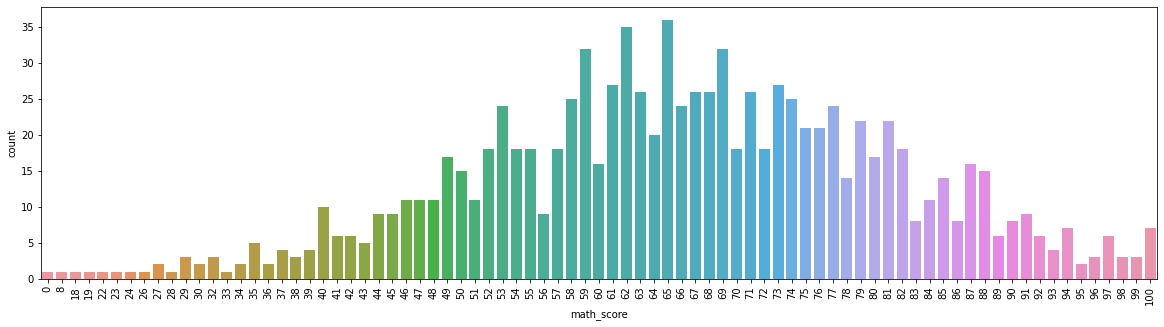

In [10]:
# Let Us Explore Math Score at First Instance
a4_dims = (20, 5)
fig, ax =plt.subplots(figsize=a4_dims)
sb.countplot(x="math_score" , data=df);
plt.xticks(rotation=90);

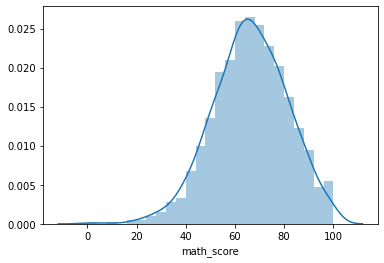

In [11]:
sb.distplot(df.math_score);

**As we can see from the tow previuos figures, The math score is nearly normally disterbuted.<br>
The most common grades are between 45 to 80. The max is 100.**

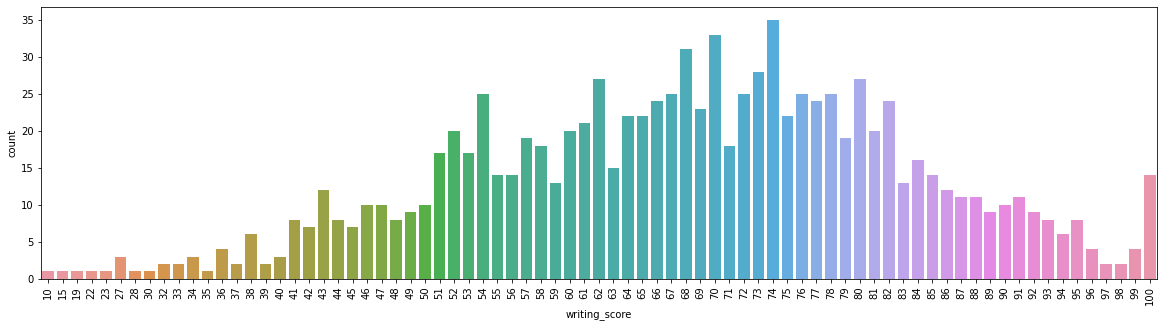

In [12]:
a4_dims = (20, 5)
fig, ax =plt.subplots(figsize=a4_dims)
plt.xticks(rotation=90);
sb.countplot(x = "writing_score" , data = df);

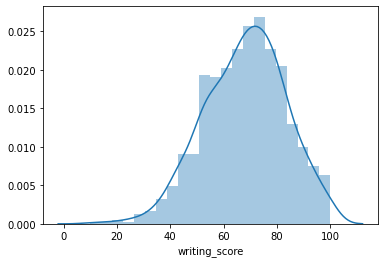

In [13]:
sb.distplot(df.writing_score);

**As we can see from the tow previuos figures, The math score is nearly normally disterbuted.<br>
The most common grades are between 50 to 80. The max is 100.**

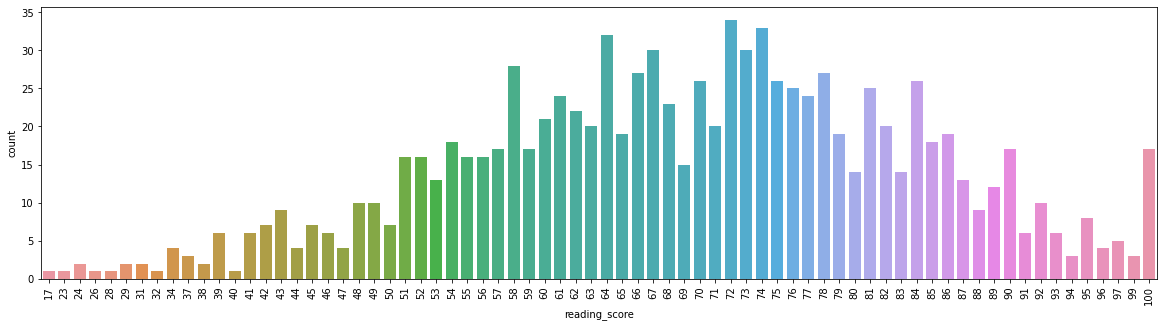

In [14]:
a4_dims = (20, 5)
fig, ax =plt.subplots(figsize=a4_dims)
plt.xticks(rotation=90);
sb.countplot(x = "reading_score" , data = df );


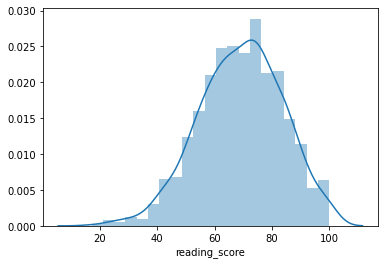

In [15]:
sb.distplot(df.reading_score);

**As we can see from the tow previuos figures, The math score is nearly normally disterbuted.<br>
The most common grades are between 55 to 85. The max is 100.**

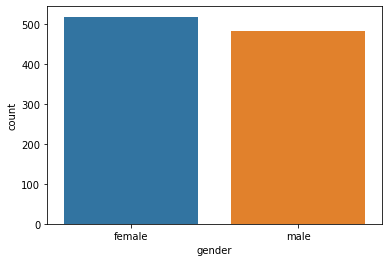

In [16]:
sb.countplot(x = "gender" , data = df );

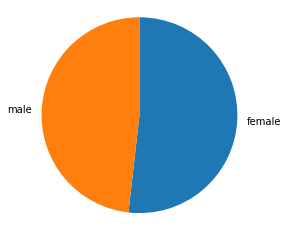

In [17]:
sorted_counts = df['gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');

**The disterbution of the gender between males and females are nearly equal. However the females are more than males by a very small number**

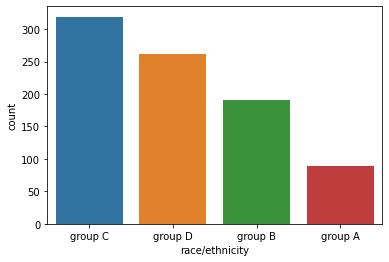

In [18]:
sb.countplot(x = "race/ethnicity" , data = df , order=df["race/ethnicity"].value_counts().index );

**Group C is the most common group**

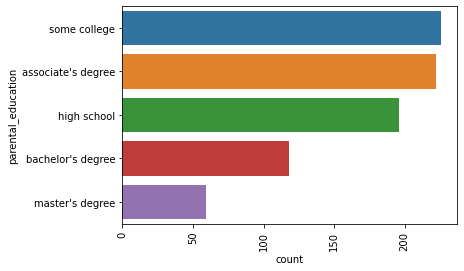

In [19]:
plt.xticks(rotation=90);

sb.countplot(y = "parental_education" , data = df,order=df.parental_education.value_counts().index );

**The majority of parental education are some college,associate's degree and high school**

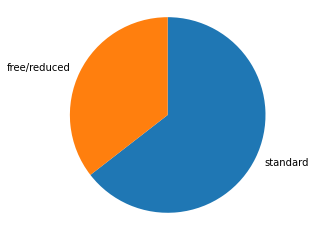

In [20]:
sorted_counts = df['lunch'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');

* The majority of the lunch are standard

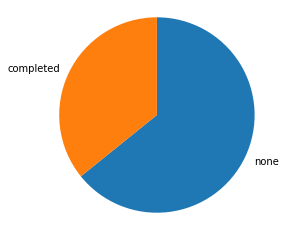

In [21]:
sorted_counts = df['t_prep_course'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');

**We can see that most students have not completed the preperation test**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There were not any unusual points. I think the data are ok and we need not to do any transformations.<br>
> We just needed to convert some data to categoral. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The data arw well-distribuded as we can see from the figures.<br>
> There were some data with object type, so I converted them to categoral.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

(gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score). only math score,reading score and writing score variables are numeric in nature

In [22]:
df.head()

,gender,race/ethnicity,parental_education,lunch,t_prep_course,math_score,reading_score,writing_score,Math_P_F,Writing_P_F,Reading_P_F
0,female,group B,bachelor's degree,standard,none,72,72,74,Passed!,Passed!,Passed!
1,female,group C,some college,standard,completed,69,90,88,Passed!,Passed!,Passed!
2,female,group B,master's degree,standard,none,90,95,93,Passed!,Passed!,Passed!
3,male,group A,associate's degree,free/reduced,none,47,57,44,Failed!,Failed!,Failed!
4,male,group C,some college,standard,none,76,78,75,Passed!,Passed!,Passed!


In [23]:
numeric_vars = ['math_score', 'reading_score', 'writing_score']
categoric_vars = ['gender', 'race/ethnicity', 'parental_education','lunch','t_prep_course',"Math_P_F","Writing_P_F","Reading_P_F"]

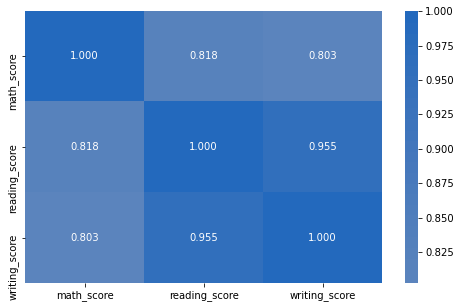

In [24]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

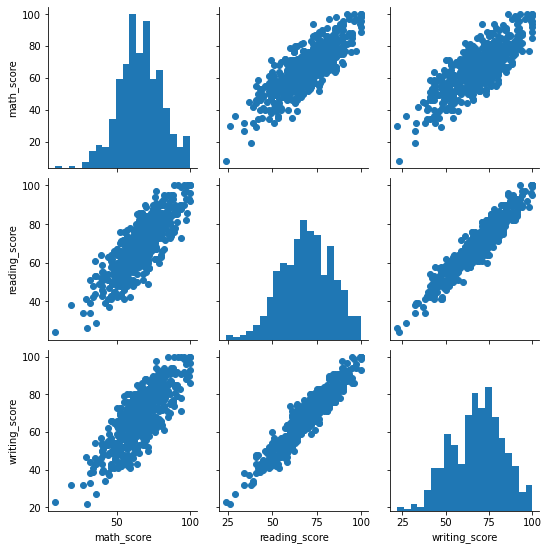

In [25]:
samples = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.loc[samples,:]

g = sb.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

**As we can see from heatmap and pairgrid, the numericl data are positivly strong related to each other.**

In [26]:
def all(df):
    print("Num of students who fail in math test is",df.query("math_score < 60").shape[0],"\\\\","Num of students who pass in math test is",df.query("math_score >= 50").shape[0])
    print("Num of students who fail in reading test is",df.query("reading_score < 60").shape[0],"\\\\","Num of students who pass in reading test is",df.query("reading_score >= 50").shape[0])
    print("Num of students who fail in writing test is",df.query("writing_score < 60").shape[0],"\\\\","Num of students who pass in writing test is",df.query("writing_score >= 50").shape[0])
    print("Percentage of students who pass in math test is",round((df.query("math_score >= 60").shape[0]/df.shape[0])*100),"%")
    print("Percentage of students who pass in reading test is",round((df.query("reading_score >= 60").shape[0]/df.shape[0])*100),"%")
    print("Percentage of students who pass in writing test is",round((df.query("writing_score >= 60").shape[0]/df.shape[0])*100),"%")

In [27]:
prepered=df.query("t_prep_course =='completed'")
NotPrepered=df.query("t_prep_course =='none'")
bachelor=df.query( """parental_education == "bachelor's degree" """)
high_school=df.query( """parental_education == "high school" """)
associate=df.query( """parental_education == "associate's degree" """)
some_college=df.query( """parental_education == "some college" """)

## Math score exeploration

In [28]:
def Math(df,b):
    print("Num of students who fail in math test is",df.query("math_score < 60").shape[0],"\\\\","Num of students who pass in math test is",df.query("math_score >= 50").shape[0])
    print("Percentage of students who pass in math test is",round((df.query("math_score >= 60").shape[0]/df.shape[0])*100),"%")

    p = sb.countplot(x= b, data = df , order = b.value_counts().index, palette="deep")

Num of students who fail in math test is 87 \\ Num of students who pass in math test is 330
Percentage of students who pass in math test is 76 %


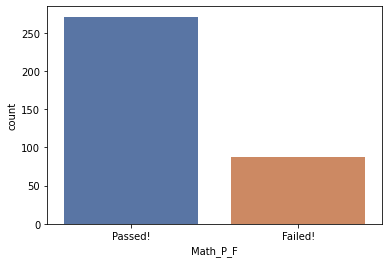

In [29]:
Math(prepered,prepered.Math_P_F)


Num of students who fail in math test is 236 \\ Num of students who pass in math test is 535
Percentage of students who pass in math test is 63 %


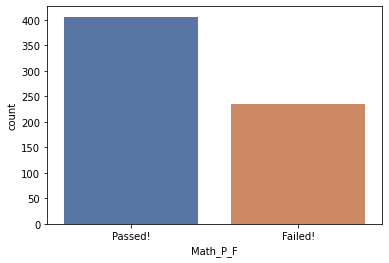

In [30]:
Math(NotPrepered,NotPrepered.Math_P_F)


**From the two figures, We can see that the students who completed the preperation test are more likly to pass the math test**

Num of students who fail in math test is 27 \\ Num of students who pass in math test is 107
Percentage of students who pass in math test is 77 %


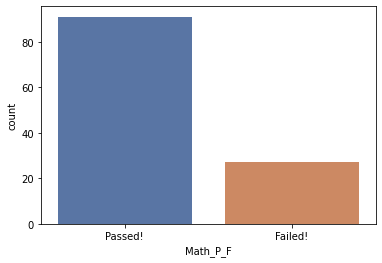

In [31]:
Math(bachelor,bachelor.Math_P_F)

Num of students who fail in math test is 17 \\ Num of students who pass in math test is 53
Percentage of students who pass in math test is 71 %


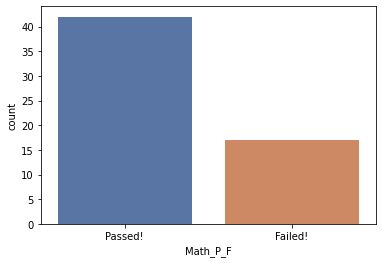

In [33]:
master=df.query( """parental_education == "master's degree" """)
Math(master,master.Math_P_F) 

Num of students who fail in math test is 79 \\ Num of students who pass in math test is 163
Percentage of students who pass in math test is 60 %


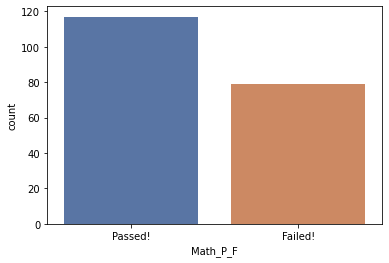

In [34]:
Math(high_school,high_school.Math_P_F) 

Num of students who fail in math test is 72 \\ Num of students who pass in math test is 195
Percentage of students who pass in math test is 68 %


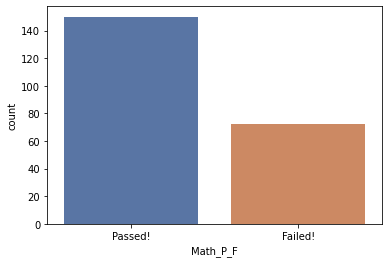

In [35]:
Math(associate,associate.Math_P_F)

Num of students who fail in math test is 64 \\ Num of students who pass in math test is 204
Percentage of students who pass in math test is 72 %


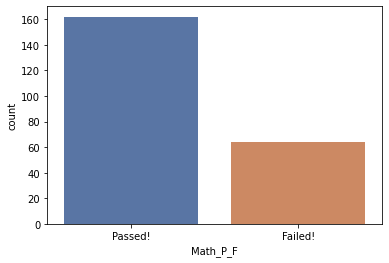

In [36]:
Math(some_college,some_college.Math_P_F)

Num of students who fail in math test is 64 \\ Num of students who pass in math test is 204
Percentage of students who pass in math test is 72 %


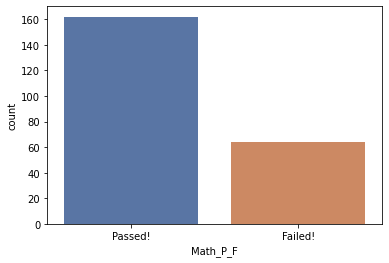

In [37]:
Math(some_college,some_college.Math_P_F) 


**We can see that students whose parental education is bachelor and master are more likly to pass math exam.**

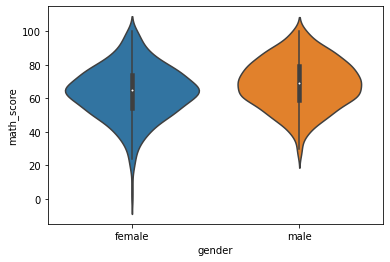

In [38]:
sb.violinplot(data=df, x='gender', y='math_score', innner=None);


**We can see that the math score of male students are in the range of 20 to 100, but the female students from about 1 to 100**<br>**Which mean that the males pass the math test more than females**

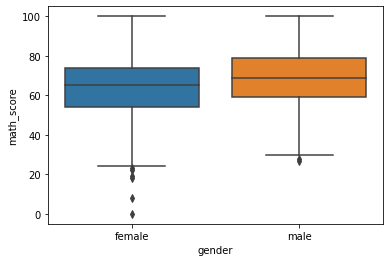

In [39]:
sb.boxplot(data=df, y='math_score', x='gender');


**Also here we can see that the mean of the males at math more than the female.**

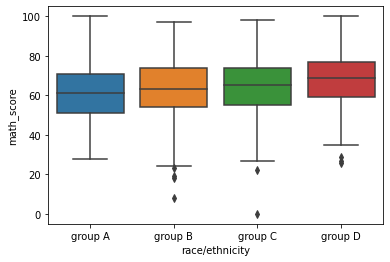

In [40]:
sb.boxplot(data=df, y='math_score', x='race/ethnicity');


**There is not signeficant differnt between race/ethnicity group**

## Writing score exeploration

In [41]:
def Writing(df,b):
    print("Num of students who fail in writing test is",df.query("writing_score < 60").shape[0],"\\\\","Num of students who pass in writing test is",df.query("writing_score >= 50").shape[0])
    print("Percentage of students who pass in writing test is",round((df.query("writing_score >= 60").shape[0]/df.shape[0])*100),"%")

    p = sb.countplot(x= b, data = df , order = b.value_counts().index, palette="deep")

Num of students who fail in writing test is 50 \\ Num of students who pass in writing test is 342
Percentage of students who pass in writing test is 86 %


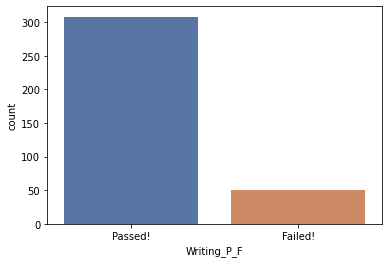

In [42]:
Writing(prepered,prepered.Writing_P_F)

Num of students who fail in writing test is 231 \\ Num of students who pass in writing test is 544
Percentage of students who pass in writing test is 64 %


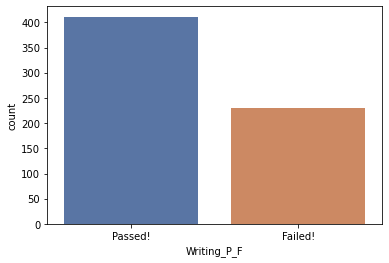

In [43]:
Writing(NotPrepered,NotPrepered.Writing_P_F)

**From the two figures, We can see that the students who completed the preperation test are more likly to pass the Writing test**

Num of students who fail in writing test is 20 \\ Num of students who pass in writing test is 109
Percentage of students who pass in writing test is 83 %


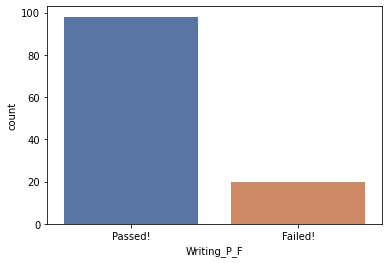

In [44]:
Writing(bachelor,bachelor.Writing_P_F)

Num of students who fail in writing test is 8 \\ Num of students who pass in writing test is 58
Percentage of students who pass in writing test is 86 %


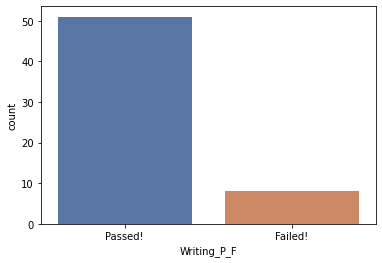

In [45]:
Writing(master,master.Writing_P_F) 

Num of students who fail in writing test is 77 \\ Num of students who pass in writing test is 159
Percentage of students who pass in writing test is 61 %


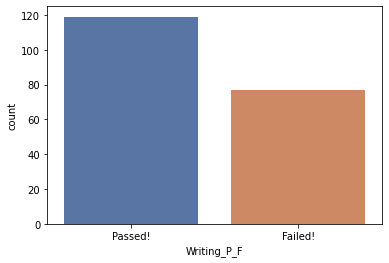

In [46]:
Writing(high_school,high_school.Writing_P_F) 

Num of students who fail in writing test is 58 \\ Num of students who pass in writing test is 205
Percentage of students who pass in writing test is 74 %


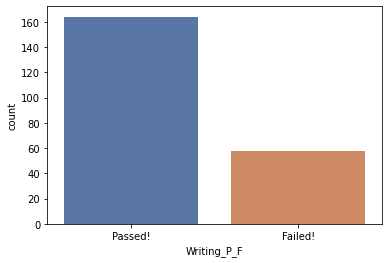

In [47]:
Writing(associate,associate.Writing_P_F) 

Num of students who fail in writing test is 55 \\ Num of students who pass in writing test is 204
Percentage of students who pass in writing test is 76 %


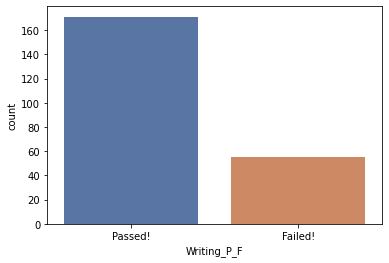

In [48]:
Writing(some_college,some_college.Writing_P_F) 

**We can see that students whose parental education is bachelor and master are more likly to pass Writing exam.**

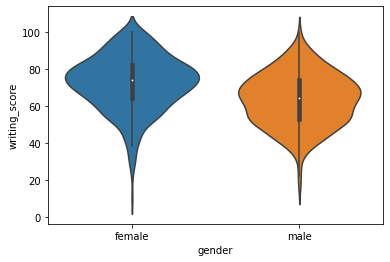

In [49]:
sb.violinplot(data=df, x='gender', y='writing_score', innner=None);


**We can see that the Writing score of female students are in the range of 40 to 100, but the male students from about 35 to 100**<br>**Which mean that the males pass the math test more than females**

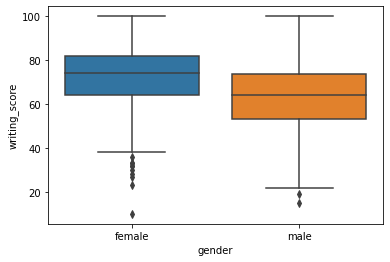

In [50]:
sb.boxplot(data=df, y='writing_score', x='gender');


**Also here we can see that the mean of the females at writing more than the male.**

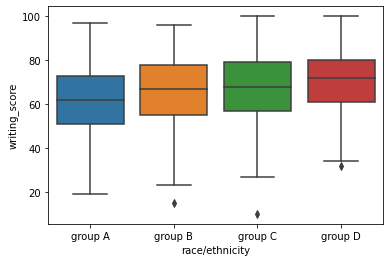

In [51]:
sb.boxplot(data=df, y='writing_score', x='race/ethnicity');


**There is not signeficant differnt between race/ethnicity group**

## Reading score exeploration

In [52]:
def Reading(df,b):
    print("Num of students who fail in reading test is",df.query("reading_score < 60").shape[0],"\\\\","Num of students who pass in reading test is",df.query("reading_score >= 50").shape[0])
    print("Percentage of students who pass in reading test is",round((df.query("reading_score >= 60").shape[0]/df.shape[0])*100),"%")
    p = sb.countplot(x= b, data = df , order = b.value_counts().index, palette="deep")


Num of students who fail in reading test is 56 \\ Num of students who pass in reading test is 342
Percentage of students who pass in reading test is 84 %


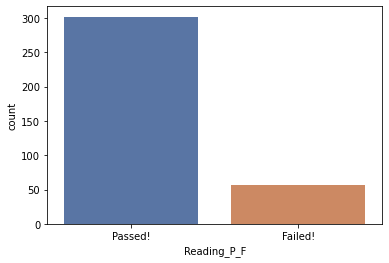

In [53]:
Reading(prepered,prepered.Reading_P_F)

Num of students who fail in reading test is 198 \\ Num of students who pass in reading test is 568
Percentage of students who pass in reading test is 69 %


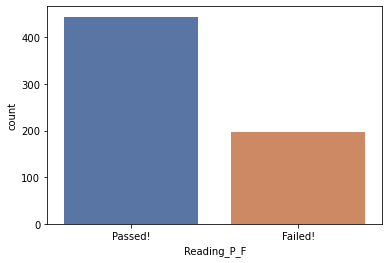

In [54]:
Reading(NotPrepered,NotPrepered.Reading_P_F)

**From the two figures, We can see that the students who completed the preperation test are more likly to pass the Reading test**

Num of students who fail in reading test is 20 \\ Num of students who pass in reading test is 111
Percentage of students who pass in reading test is 83 %


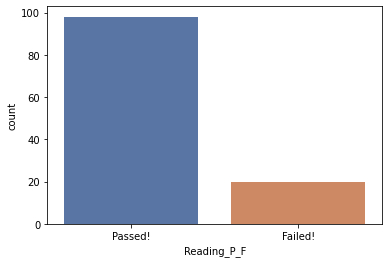

In [55]:
Reading(bachelor,bachelor.Reading_P_F)

Num of students who fail in reading test is 9 \\ Num of students who pass in reading test is 58
Percentage of students who pass in reading test is 85 %


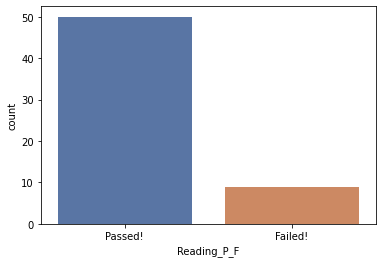

In [56]:
Reading(master,master.Reading_P_F) 

Num of students who fail in reading test is 68 \\ Num of students who pass in reading test is 169
Percentage of students who pass in reading test is 65 %


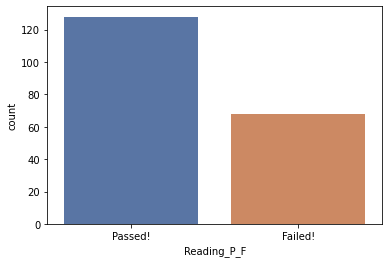

In [57]:
Reading(high_school,high_school.Reading_P_F) 

Num of students who fail in reading test is 51 \\ Num of students who pass in reading test is 209
Percentage of students who pass in reading test is 77 %


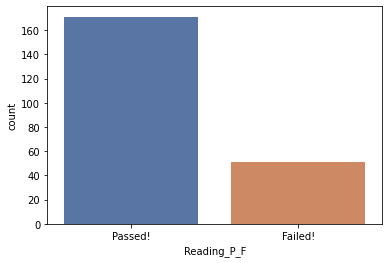

In [58]:
Reading(associate,associate.Reading_P_F) 

Num of students who fail in reading test is 51 \\ Num of students who pass in reading test is 206
Percentage of students who pass in reading test is 77 %


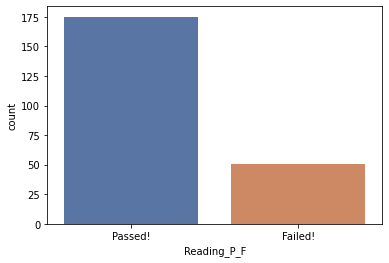

In [59]:
Reading(some_college,some_college.Reading_P_F) 

**We can see that students whose parental education is bachelor and master are more likly to pass reading exam.**

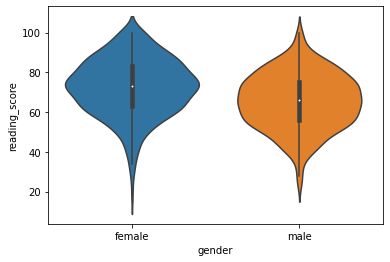

In [60]:
sb.violinplot(data=df, x='gender', y='reading_score', innner=None);


**We can see that the math score of female students are in the range of 45 to 100, but the male students from about 40 to 100**<br>**Which mean that the females pass the read test more than males**

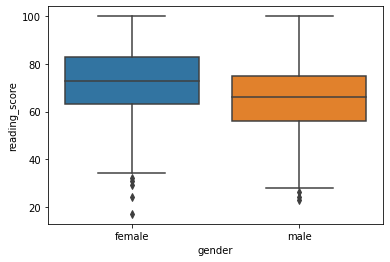

In [61]:
sb.boxplot(data=df, y='reading_score', x='gender');


**Also here we can see that the mean of the females at math more than the males.**

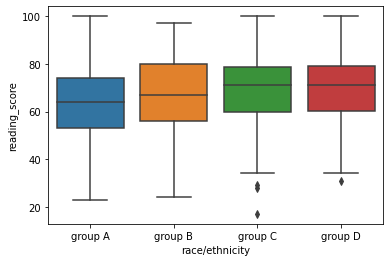

In [62]:
sb.boxplot(data=df, y='reading_score', x='race/ethnicity');

**There is not signeficant differnt between race/ethnicity group**

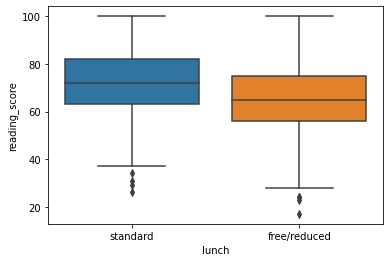

In [63]:
sb.boxplot(data=df, y='reading_score', x='lunch');

The student who has standard lunch has a little bit higher mean than free/reduced one

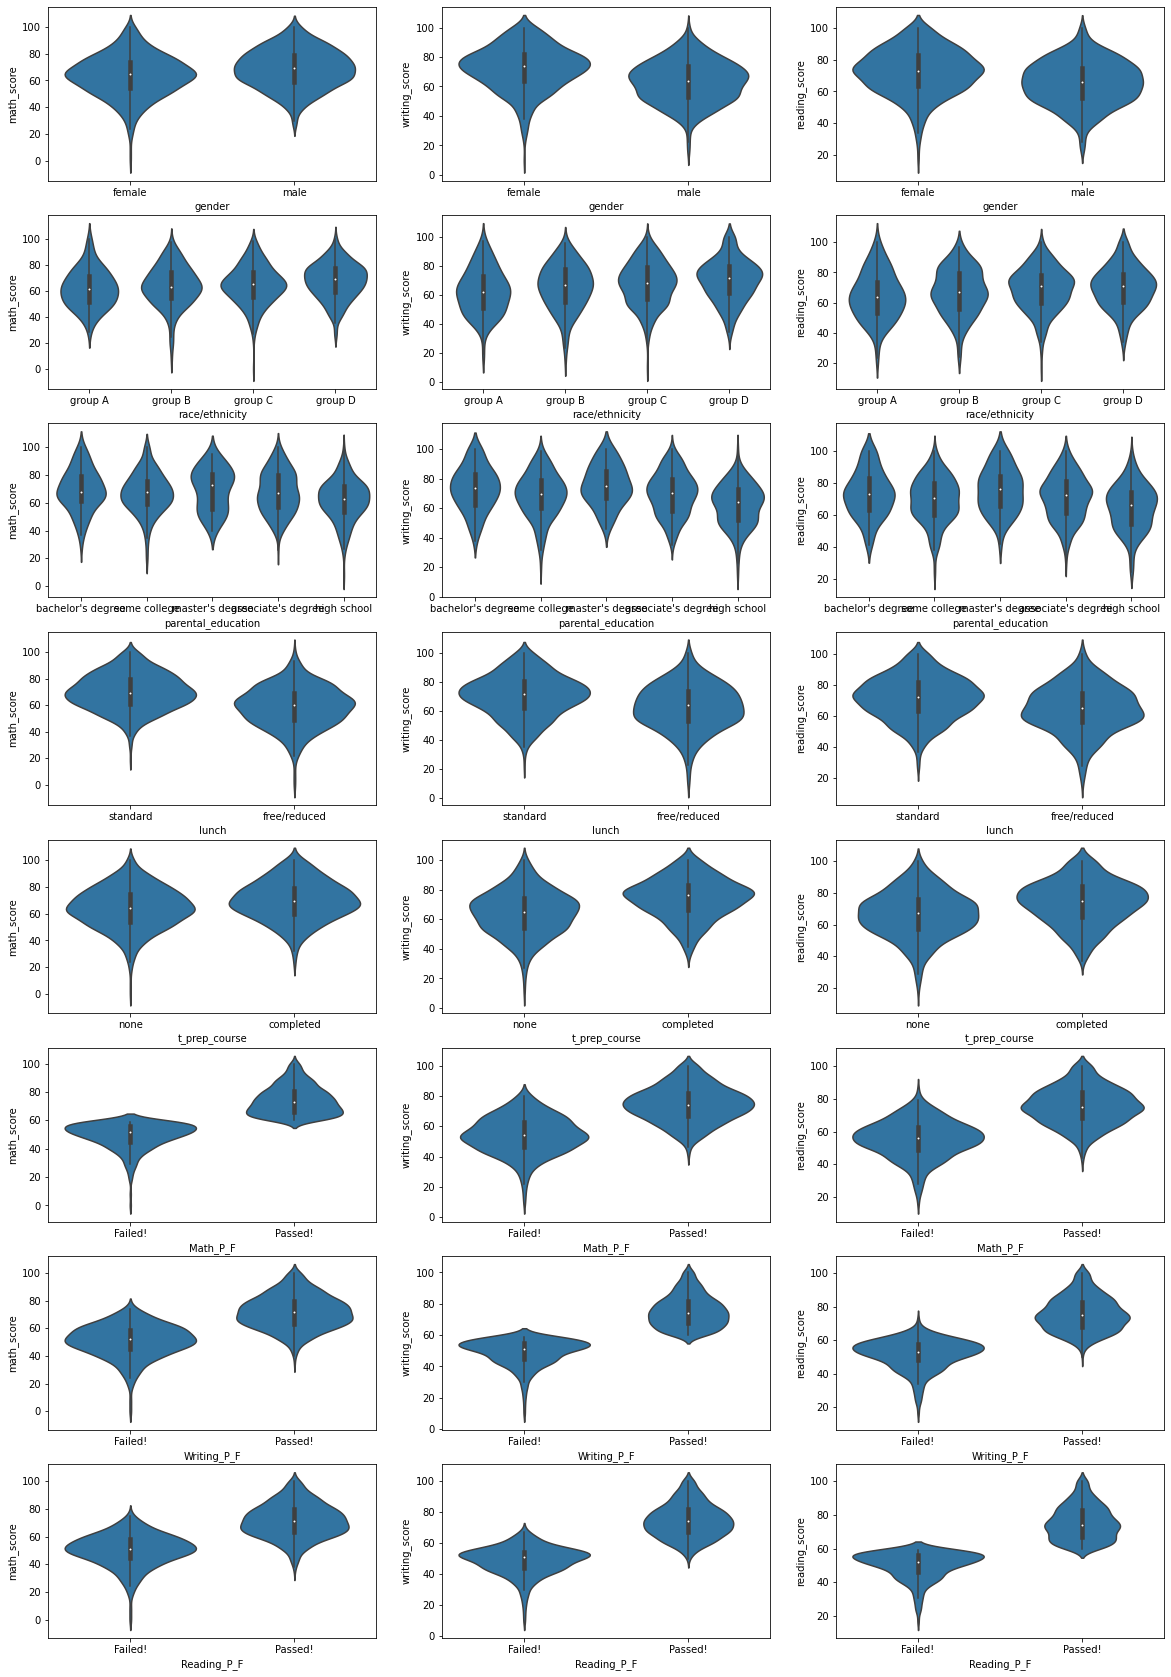

In [64]:
# plot the categorical variables with students grades
# with full data and variable transforms
fig, ax = plt.subplots(ncols = 3, nrows = 8 , figsize = [20,30])
default_color = sb.color_palette()[0]
for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = df, x = var, y = 'math_score', ax = ax[i,0],
               color = default_color)
    sb.violinplot(data = df, x = var, y = 'writing_score', ax = ax[i,1],
               color = default_color)
    sb.violinplot(data = df, x = var, y = 'reading_score', ax = ax[i,2],
               color = default_color)
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As we can see that there is a relation between test preperation and students score. <br>
> As the nuber of students who competed the test preperation are more likely to perefore well at exams.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed that the gender affect the pereforemance but not a signeficant effect.<br>
> In math test, The males passed the test are more than females<br>
> In reading and writing test,  The females passed the test are more than males

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

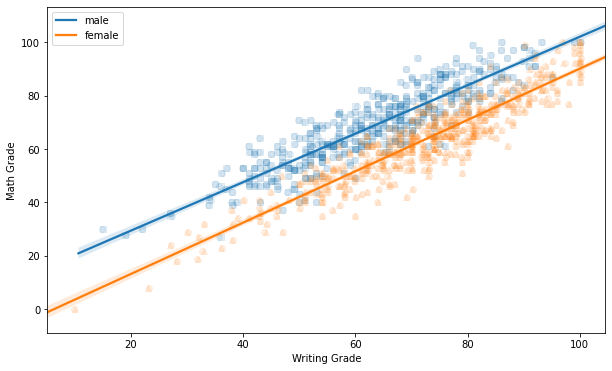

In [65]:
cat_markers = [['male', 's'],['female', '^']]
plt.figure(figsize=(10,6))

for cat, marker in cat_markers:
    df_cat = df[df['gender'] == cat]
    sb.regplot(data = df_cat, x = 'writing_score', y = 'math_score', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/10});
    plt.scatter(data = df_cat, y = 'math_score', x = 'writing_score', marker = marker, alpha=1/10)
plt.legend(['male','female']);
plt.ylabel("Math Grade");
plt.xlabel("Writing Grade");

We can see that the males has higher grade in math than females. But in writing the oposite ocurrs

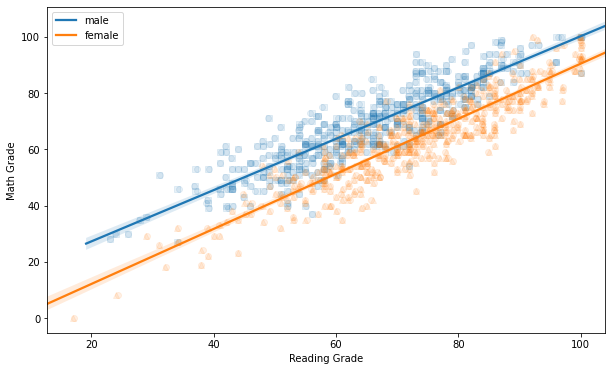

In [76]:
cat_markers = [['male', 's'],['female', '^']]
plt.figure(figsize=(10,6))

for cat, marker in cat_markers:
    df_cat = df[df['gender'] == cat]
    sb.regplot(data = df_cat, x = 'reading_score', y = 'math_score', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/10});
    plt.scatter(data = df_cat, y = 'math_score', x = 'reading_score', marker = marker, alpha=1/10)
plt.legend(['male','female']);
plt.ylabel("Math Grade");
plt.xlabel("Reading Grade");

We can see that the males has higher grade in math than females. But in writing the oposite ocurrs

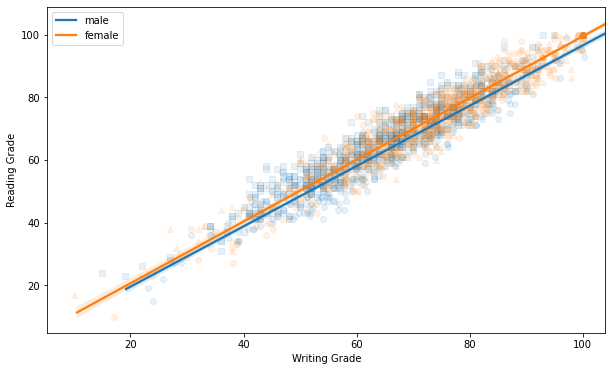

In [77]:
cat_markers = [['male', 's'],['female', '^']]
plt.figure(figsize=(10,6))
for cat, marker in cat_markers:
    df_cat = df[df['gender'] == cat]
    sb.regplot(data = df_cat, x = 'reading_score', y = 'writing_score', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/10});
    plt.scatter(data = df_cat, y = 'reading_score', x = 'writing_score', marker = marker,alpha=1/10)
plt.legend(['male','female']);
plt.ylabel("Reading Grade");
plt.xlabel("Writing Grade");

Here both males and females, Are about to have the same grade in both tests writing and reading.

C:\Users\aiadm\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\aiadm\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


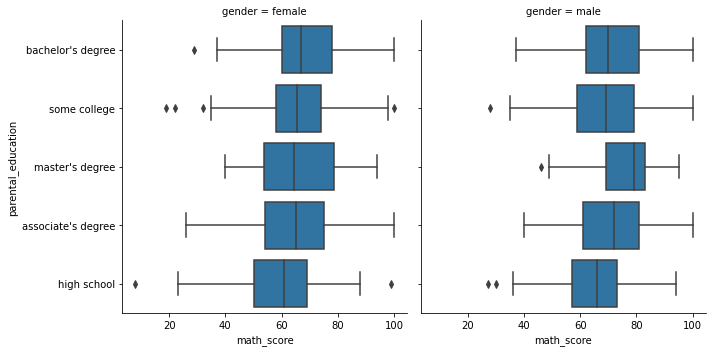

In [68]:
g = sb.FacetGrid(data = df, col = 'gender', size = 5)
g.map(sb.boxplot, 'math_score', 'parental_education');


We can see that the mean of males whose parent has master get high grade in math.<br>And the females whose parents has high school get the less grade than the other degrees

C:\Users\aiadm\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\aiadm\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


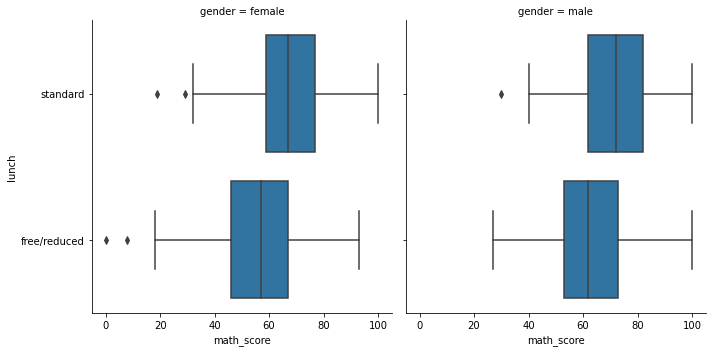

In [69]:
g = sb.FacetGrid(data = df, col = 'gender', size = 5)
g.map(sb.boxplot, 'math_score', 'lunch');


Here we noticed that the the males and females who has a standerd lunch pereformed well more than those with free/reduced one.

C:\Users\aiadm\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\aiadm\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


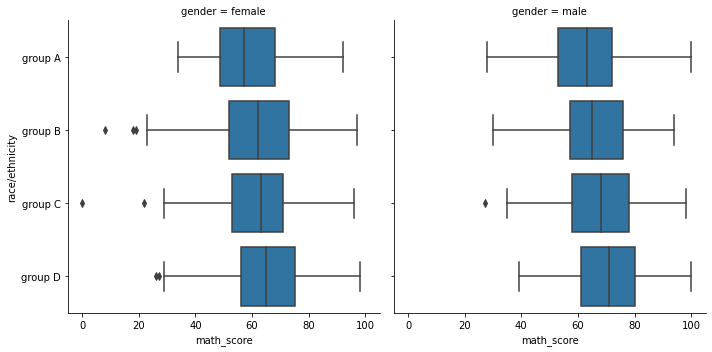

In [70]:
g = sb.FacetGrid(data = df, col = 'gender', size = 5)
g.map(sb.boxplot, 'math_score', 'race/ethnicity');


Here I noticed that there is no signeficant variation in the groups.

C:\Users\aiadm\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\aiadm\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


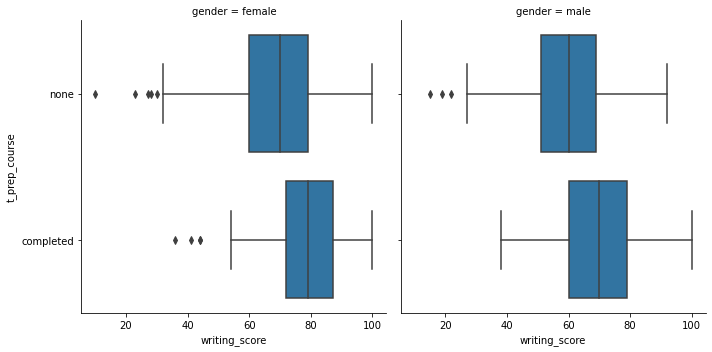

In [71]:
g = sb.FacetGrid(data = df, col = 'gender', size = 5)
g.map(sb.boxplot, 'writing_score', 't_prep_course');


Here we can noticed that both gender pereform well when they complete the preperation test.

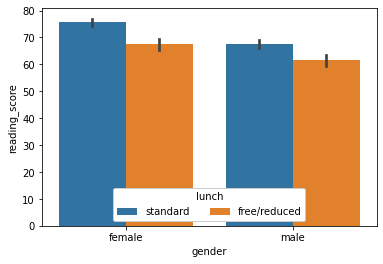

In [72]:
ax = sb.barplot(data = df, x = 'gender', y = 'reading_score', hue = 'lunch')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'lunch');

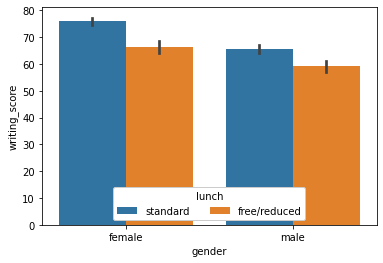

In [73]:
ax = sb.barplot(data = df, x = 'gender', y = 'writing_score', hue = 'lunch')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'lunch');

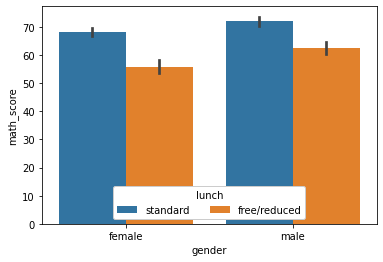

In [74]:
ax = sb.barplot(data = df, x = 'gender', y = 'math_score', hue = 'lunch')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'lunch');

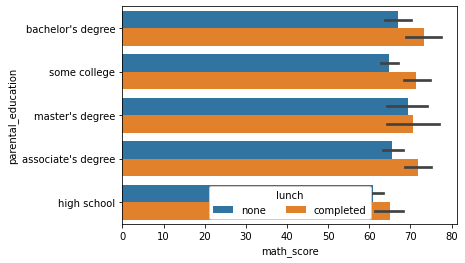

In [75]:
ax = sb.barplot(data = df, y = 'parental_education', x = 'math_score', hue = 't_prep_course')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'lunch');



### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I noticed that the pereformence of the students is related to parental education, gender and test preperation<br>
> All the students who completed the test and there parents has master or bachelor degree pereform well specially in math test

### Were there any interesting or surprising interactions between features?

>I think we can use machine learning to predect the student pereformance as the features parental education, gender and test preperation can give us a usefull information about the pereformance of the students